In [1]:
from function import *
import xarray as xr

PATHS = {
    'abandonment': "D:/xarray/abandonment_chunkall/*.nc",
    'feature':     "D:/xarray/aligned2/Feature_all/*.nc",
    'csv':         "aligned_for_training.csv",
    'test_output': "positive_samples_test_500.csv",
    'output':      "positive_samples_full_with_features.csv"
}
YEARS = [2018, 2020]

# 1. 打开并 rechunk
ds_abandon, ds_feat = load_datasets(
    PATHS['abandonment'], PATHS['feature'])

ds_merge=xr.merge([ds_abandon, ds_feat])
# Convert coordinates to float32 while preserving other variables
ds_merge = ds_merge.assign_coords({
    'lon': ds_merge.lon.astype('float32'),
    'lat': ds_merge.lat.astype('float32')
})

# For variables without time dimension, expand them to have same value for all times
for var in ds_merge.data_vars:
    if 'time' not in ds_merge[var].dims:
        # Expand the variable to have time dimension with same values
        ds_merge[var] = ds_merge[var].expand_dims(time=ds_merge.time)
ds_merge

gogogo


c:\Users\zpy10\Anaconda3\envs\glbcropland\Lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 31
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\glbcropland\Lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 31
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\glbcropland\Lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 31
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\glbcropland\Lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 31
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\glbcropland\Lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 124
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\glbcropland\Lib\site-packages\xarray\core\indexing.py:1598: PerformanceWarning: Slicing is producing a large chunk

<xarray.Dataset> Size: 3TB
Dimensions:               (time: 31, lat: 21600, lon: 43200)
Coordinates:
  * time                  (time) datetime64[ns] 248B 1992-01-01 ... 2022-01-01
    spatial_ref           int32 4B 0
    band                  int32 4B 1
  * lon                   (lon) float32 173kB -180.0 -180.0 ... 180.0 180.0
  * lat                   (lat) float32 86kB -90.0 -89.99 -89.98 ... 89.99 90.0
Data variables: (12/19)
    abandonment_year      (time, lat, lon) float32 116GB dask.array<chunksize=(31, 4600, 2500), meta=np.ndarray>
    abandonment_duration  (time, lat, lon) float32 116GB dask.array<chunksize=(31, 4600, 2500), meta=np.ndarray>
    recultivation         (time, lat, lon) float32 116GB dask.array<chunksize=(31, 4600, 2500), meta=np.ndarray>
    current_abandonment   (time, lat, lon) float32 116GB dask.array<chunksize=(31, 4600, 2500), meta=np.ndarray>
    landcover             (time, lat, lon) float32 116GB dask.array<chunksize=(16, 4350, 2250), meta=np.ndarray>
    DEM                   (time, lat, lon) float32 116GB dask.array<chunksize=(31, 1440, 2880), meta=np.ndarray>
    ...                    ...
    Slope                 (time, lat, lon) float32 116GB dask.array<chunksize=(31, 1440, 2880), meta=np.ndarray>
    TertiaryRoad          (time, lat, lon) float64 231GB dask.array<chunksize=(31, 978, 1964), meta=np.ndarray>
    gdmp                  (time, lat, lon) float64 231GB dask.array<chunksize=(26, 2700, 5400), meta=np.ndarray>
    rsds                  (time, lat, lon) float32 116GB dask.array<chunksize=(26, 3084, 6172), meta=np.ndarray>
    tas                   (time, lat, lon) float64 231GB dask.array<chunksize=(26, 2700, 5400), meta=np.ndarray>
    wind                  (time, lat, lon) float32 116GB dask.array<chunksize=(26, 100, 500), meta=np.ndarray>

In [3]:
ds_merge

<xarray.Dataset> Size: 1TB
Dimensions:               (time: 31, lat: 21600, lon: 43200)
Coordinates:
  * time                  (time) datetime64[ns] 248B 1992-01-01 ... 2022-01-01
    spatial_ref           int32 4B 0
    band                  int32 4B 1
  * lon                   (lon) float32 173kB -180.0 -180.0 ... 180.0 180.0
  * lat                   (lat) float32 86kB -90.0 -89.99 -89.98 ... 89.99 90.0
Data variables: (12/19)
    abandonment_year      (lat, lon) float32 4GB dask.array<chunksize=(4600, 2500), meta=np.ndarray>
    abandonment_duration  (lat, lon) float32 4GB dask.array<chunksize=(4600, 2500), meta=np.ndarray>
    recultivation         (lat, lon) float32 4GB dask.array<chunksize=(4600, 2500), meta=np.ndarray>
    current_abandonment   (lat, lon) float32 4GB dask.array<chunksize=(4600, 2500), meta=np.ndarray>
    landcover             (time, lat, lon) float32 116GB dask.array<chunksize=(16, 4350, 2250), meta=np.ndarray>
    DEM                   (lat, lon) float32 4GB dask.array<chunksize=(1440, 2880), meta=np.ndarray>
    ...                    ...
    Slope                 (lat, lon) float32 4GB dask.array<chunksize=(1440, 2880), meta=np.ndarray>
    TertiaryRoad          (lat, lon) float64 7GB dask.array<chunksize=(978, 1964), meta=np.ndarray>
    gdmp                  (time, lat, lon) float64 231GB dask.array<chunksize=(26, 2700, 5400), meta=np.ndarray>
    rsds                  (time, lat, lon) float32 116GB dask.array<chunksize=(26, 3084, 6172), meta=np.ndarray>
    tas                   (time, lat, lon) float64 231GB dask.array<chunksize=(26, 2700, 5400), meta=np.ndarray>
    wind                  (time, lat, lon) float32 116GB dask.array<chunksize=(26, 100, 500), meta=np.ndarray>

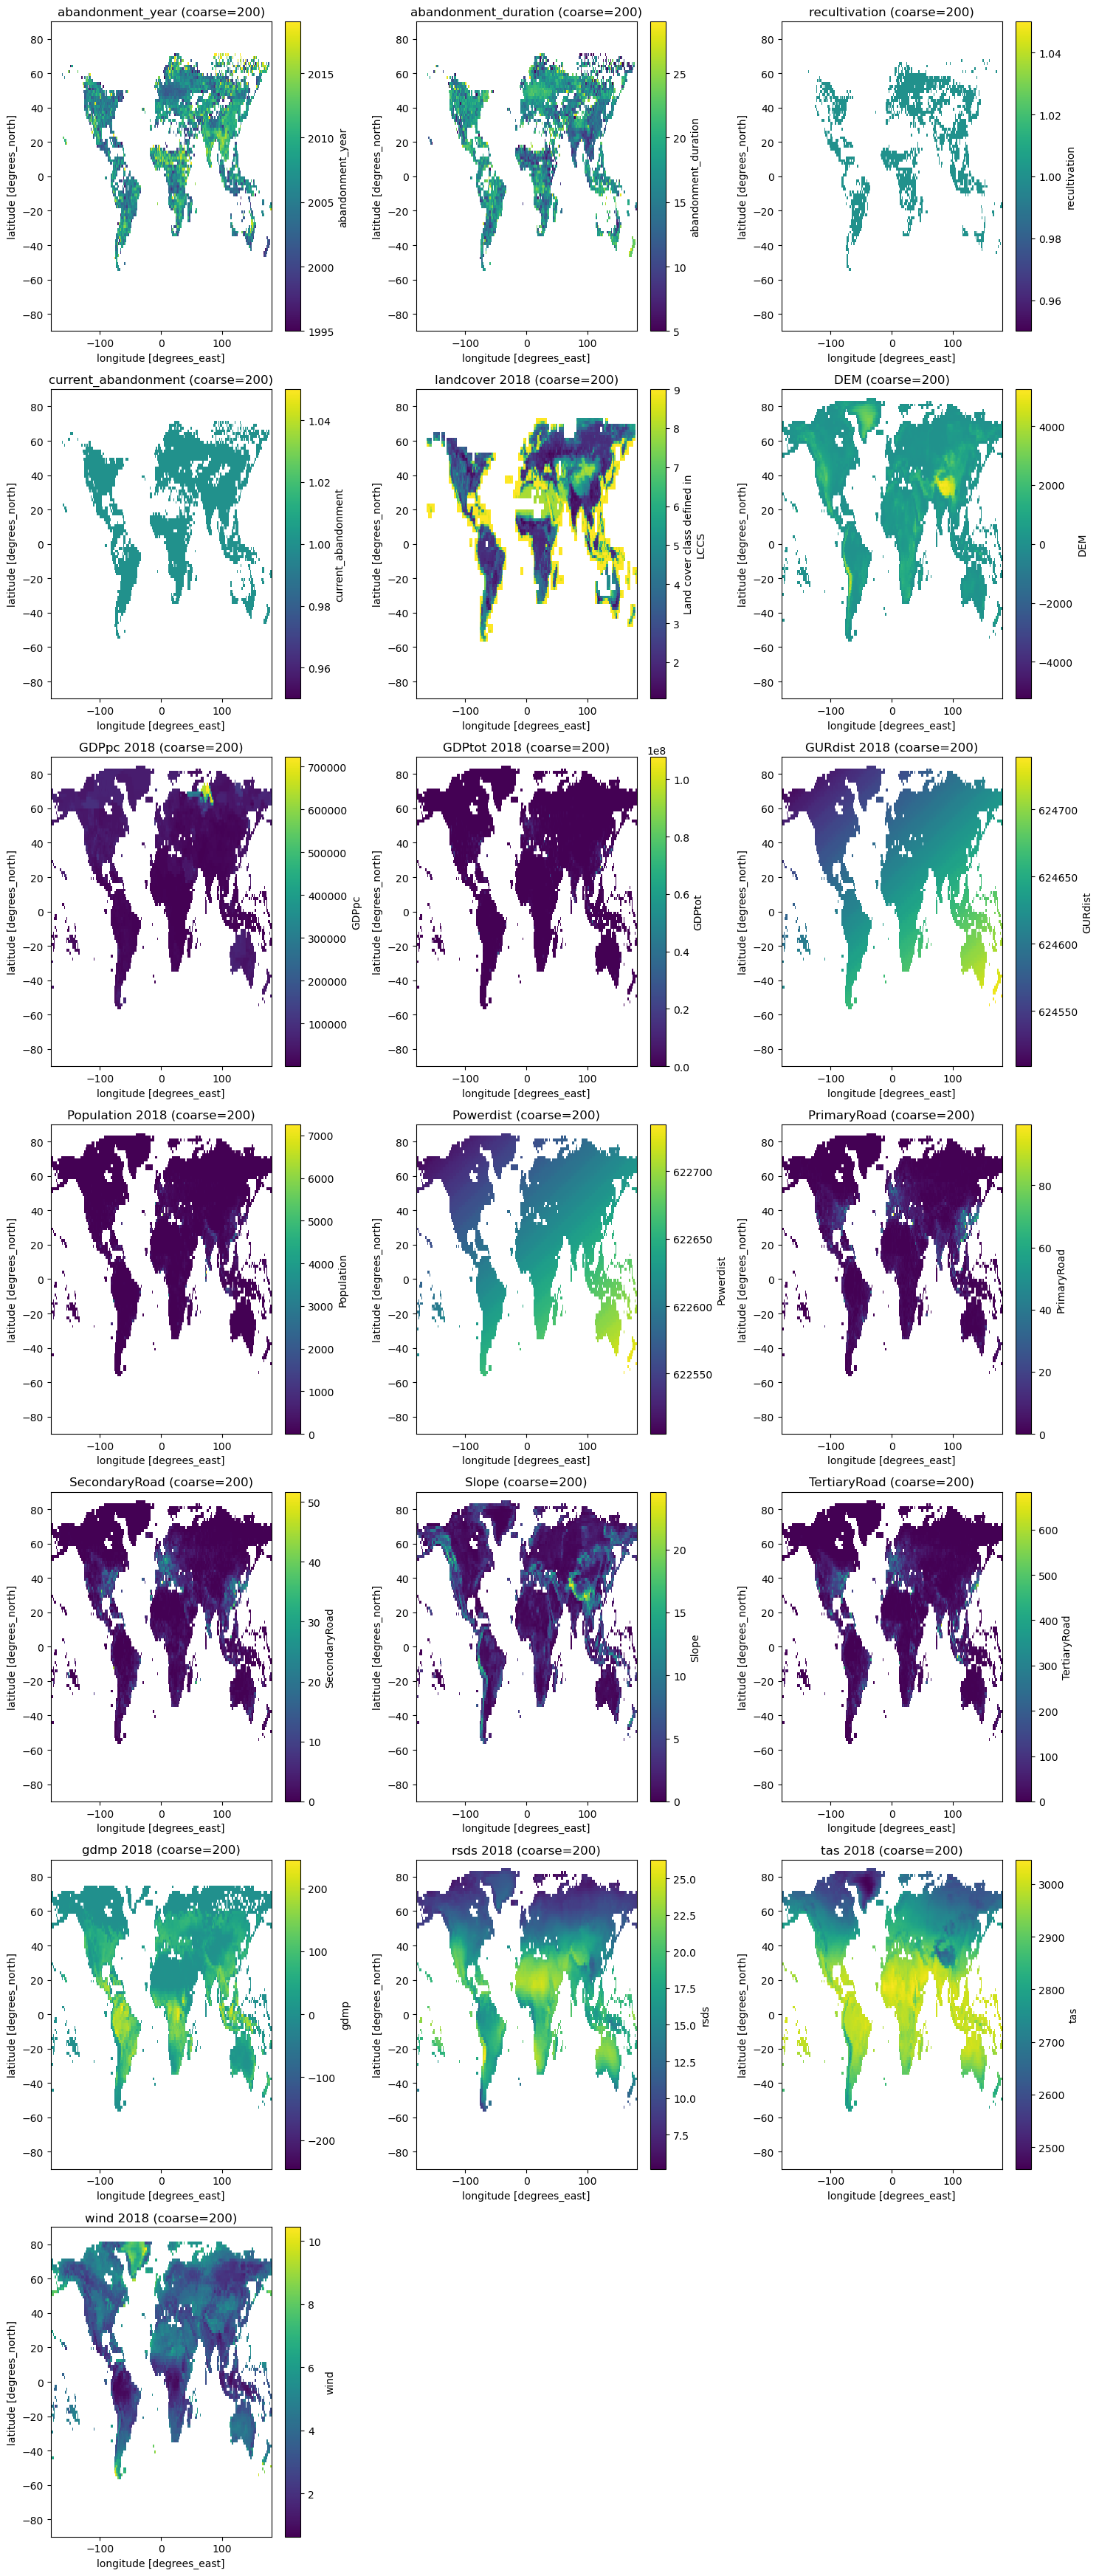

In [5]:
# Plot DEM, slope and GDMP for 2020
import matplotlib.pyplot as plt

# Get all variables from ds_merge
variables = list(ds_merge.data_vars)

# Create a figure with appropriate size
n_vars = len(variables)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot each variable
for idx, var_name in enumerate(variables):
    var = ds_merge[var_name]
    
    # Check if variable has time dimension
    if 'time' in var.dims:
        # Plot for year 2018 with coarse=200
        var.sel(time='2018').coarsen(lat=200, lon=200).mean().plot(ax=axes[idx], cmap='viridis')
        axes[idx].set_title(f'{var_name} 2018 (coarse=200)')
    else:
        # Plot without time selection, with coarse=200
        var.coarsen(lat=200, lon=200).mean().plot(ax=axes[idx], cmap='viridis')
        axes[idx].set_title(f'{var_name} (coarse=200)')

# Remove empty subplots if any
for idx in range(len(variables), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [10]:
# Print the type of 'lat' dimension for each variable
for var_name in ds_merge.data_vars:
    var = ds_merge[var_name]
    print(f"{var_name}: {var.lat.dtype}")

abandonment_year: float64
abandonment_duration: float64
recultivation: float64
current_abandonment: float64
landcover: float64
DEM: float64
GDPpc: float64
GDPtot: float64
GURdist: float64
Population: float64
Powerdist: float64
PrimaryRoad: float64
SecondaryRoad: float64
Slope: float64
TertiaryRoad: float64
gdmp: float64
rsds: float64
tas: float64
wind: float64
